# Packages and functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pyplot import text
from google.colab import data_table
data_table.enable_dataframe_formatter()

new function from rep 5

In [ ]:
def co2in_read(co2in_path,temp_path,start,end):

#-------------------------------- co2 in data--------------------------------
  df = pd.read_excel(co2in_path) # reading the raw date (xlsx)
  # combine columns to datime:
  time = (pd.to_datetime(df['Hour'].astype(str) + ':' + df['Minute'].astype(str), format='%H:%M').dt.time)
  df['Time'] = time
  df['Year'] = 2022
  df['Timestap'] = pd.to_datetime(df[["Year", "Month", "Day",'Hour','Minute']])
  df = df.set_index(df['Timestap'])
  df_clean = df[['Rec No.', 'CO2', 'Error']]
  df_clean = df_clean.resample('1min').mean() # resample the data for comparing the with temp and co2 out

#-------------------------------- Temp data--------------------------------

  # loading the temp data:
  df_temp = pd.read_csv(temp_path) # reading the raw date (csv)
  df_temp = df_temp.set_index('Time')
  df_temp.index = pd.to_datetime(df_temp.index) # convert to datime format
  df_temp = df_temp.resample('1min').mean()
  df_temp = df_temp.interpolate() # interpolate Nan values
  plt.plot(df_temp)


#-------------------------------- Join the 2 dfs to one--------------------------------
  
  # Join the 3 dfs to one
  df_exp = df_temp[start:end]
  df_exp['co2_in'] = df_clean['CO2'].loc[start:end] #co2 in data
  time_values = np.arange(1, len(df_exp['co2_in'])+1)
  time_values=time_values.tolist()
  df_exp["time(min)"] = time_values
  return df_exp

In [ ]:
def co2in_read_new(co2in_path,temp_path,start,end):

#-------------------------------- co2 in data--------------------------------
  df = pd.read_excel(co2in_path) # reading the raw date (xlsx)
  # combine columns to datime:
  df = df.interpolate()
  df['Hour'] = df['Hour'].astype(int)
  df['Minute'] = df['Minute'].astype(int)
  df['Month'] = df['Month'].astype(int)
  df['Day'] = df['Day'].astype(int)
  df['Year'] = 2022

  time = (pd.to_datetime(df['Hour'].astype(str) + ':' + df['Minute'].astype(str), format='%H:%M').dt.time)
  df['Time'] = time
  df['Timestap'] = pd.to_datetime(df[["Year", "Month", "Day",'Hour','Minute']])
  df_clean = df[['Timestap','Rec No.', 'CO2', 'Error']]
  df_clean = df_clean.set_index(df_clean['Timestap'])
  df_clean = df_clean.resample('1min').mean() # resample the data for comparing the with temp and co2 out
  plt.plot(df_clean['CO2'])

#-------------------------------- Temp data--------------------------------

  # loading the temp data:
  df_temp = pd.read_csv(temp_path) # reading the raw date (csv)
  df_temp = df_temp.set_index('Time')
  df_temp.index = pd.to_datetime(df_temp.index) # convert to datime format
  df_temp = df_temp.resample('1min').mean()
  df_temp = df_temp.interpolate() # interpolate Nan values
  plt.plot(df_temp)


#-------------------------------- Join the 2 dfs to one--------------------------------
  
  # Join the 3 dfs to one
  df_exp = df_temp[start:end]
  df_exp['co2_in'] = df_clean['CO2'].loc[start:end] #co2 in data
  time_values = np.arange(1, len(df_exp['co2_in'])+1)
  time_values=time_values.tolist()
  df_exp["time(min)"] = time_values
  return df_exp

$CO_2$ *file*

In [ ]:
# # importing the essential libraries
# import pandas as pd
# import subprocess
# import os
# import time
# from pathlib import Path
# import logging
# import requests
# import fnmatch, shutil

# #########Instructions#########
# # 1. Define paths to .dat file and project folder.
# # 2. Go to csv_to_df function, and edit the wanted columns in your dataframe.
# # 3. Run all.
# # 4. Have fun with your new pandas dataframe.
# ##############################


# #################DEFINE PATHS HERE, and then RUN ALL#################
# # global vars
# data_folder_path = "/content/drive/MyDrive/Greenwall/co2_and_counting_people" # path to your project folder (where the csv is going to be saved)
# file_dat_source = "/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/CR1000_M&M-VSLab_indoor_ProgRas(6).dat" # direct path to original .dat file 
# ######################################################################

# # dat to csv conversion
# def downloadCsv(file_dat_source):

#     t = time.localtime()
#     timestamp = time.strftime('%b-%d-%Y_%H%M', t)
    

#     #url = 'link' # link to the *.dat file  - UNCOMMENT IF YOU WANT TO DOWNLOAD FROM URL
#     #r = requests.get(url, allow_redirects=True) - UNCOMMENT IF YOU WANT TO DOWNLOAD FROM URL
    
    
#     file_dat = f'{data_folder_path}/{timestamp}.dat'
#     file_csv = f'{data_folder_path}/{timestamp}.csv'
#     latest_csv = f'{data_folder_path}/latest.csv'
#     shutil.copyfile(file_dat_source, file_dat) # making a copy of the latest dat (source)
    
#     #open(file_dat, 'wb').write(r.content) # download source *.dat file from url to local - UNCOMMENT IF YOU WANT TO DOWNLOAD FROM URL

#     # converting dat to csv
#     with open(file_dat) as f:
#         with open(file_csv, "w") as f1:
#             next(f) # skip false header line
#             for line in f:
#                 f1.write(line)

#     shutil.copyfile(file_csv, latest_csv) # making a copy of the latest csv
       
#     # remove temp dat+ csv files, leaving only latest.csv
#     if os.path.exists(file_dat):
#       os.remove(file_dat)
#     if os.path.exists(file_csv):
#       os.remove(file_csv)
   
# # csv to pandas df conversion
# def csv_to_df(data_folder_path):
#   df = pd.read_csv(f'{data_folder_path}/latest.csv', parse_dates=['TIMESTAMP'], low_memory=False) #

#   # convert columns to numeric values
#   for col in df.columns:
#     if col != "TIMESTAMP": 
#       df[col] = df[col].astype(float, errors = 'ignore') 
#       df.dropna(subset = [col], inplace=True)

  
#   df = df[['TIMESTAMP','Par_Avg', 'Temp_in_Avg', 'Temp_out_Avg', 'Rh_in_Avg', 'Rh_out_Avg']] # choose your wanted columns from your df
#   df = df.iloc[3:] #take the data, starting from the 3rd row (in your dat file, you may need a different start row)
#   df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP']) # convert timestamp column to datetime object type
#   return df

# ##########CALLING THE FUNCTIONS##########
# # calling the functions to convert dat->csv->pandas df
# downloadCsv(file_dat_source) #don't forget to define paths at top
# my_df = csv_to_df(data_folder_path) # your dataf

In [ ]:
path= "/content/drive/MyDrive/Greenwall/co2_and_counting_people/latest.csv"
df_co2_out = pd.read_csv(path) # reading the raw date (csv)
df_co2_out = df_co2_out[['TIMESTAMP','Valve_no', 'CO2_Avg']] # choose your wanted columns from your df
df_co2_out = df_co2_out.loc[df_co2_out['Valve_no']== 10] # we want the data from outside - valve 10
df_co2_out['TIMESTAMP'] = pd.to_datetime(df_co2_out['TIMESTAMP'])
df_co2_out = df_co2_out.iloc[3:] #take the data, starting from the 3rd row (in your dat file, you may need a different start row)
df_co2_out = df_co2_out.set_index('TIMESTAMP') #index column
df_co2_out = df_co2_out.resample('1min').mean()
df_co2_out['CO2_Avg'] = df_co2_out['CO2_Avg'].interpolate() # interpolate Nan values
df_co2_out = df_co2_out.loc[df_co2_out['Valve_no']== 10]
df_co2_out['CO2_Avg'] = df_co2_out['CO2_Avg'].interpolate()

def co2col(df_co2,df,start,end):
  df['co2_out'] = df_co2['CO2_Avg'][start:end]
  df['co2_out'] = df['co2_out'].interpolate()
  df['diff'] = df['co2_in']-df['co2_out']
  
  return df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_co2_out

,Valve_no,CO2_Avg
TIMESTAMP,,
2021-06-17 07:55:00,10.0,424.70
2021-06-17 07:56:00,10.0,424.65
2021-06-17 08:24:00,10.0,422.75
2021-06-17 08:25:00,10.0,422.80
2021-06-17 08:26:00,10.0,421.25
...,...,...
2022-05-08 20:43:00,10.0,397.05
2022-05-08 20:44:00,10.0,396.20
2022-05-08 21:12:00,10.0,395.80


# Room Exps

## Rep9 - New Exp
05/04/2022 14:40

In [ ]:
df_exp9 = co2in_read_new("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/rep9_room/co2in.xlsx","/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/rep9_room/lab_temp-data-2022-04-07 09_42_59.csv","2022-04-05 13:30:00","2022-04-06 11:15:00")
df_exp9 = co2col(df_co2_out,df_exp9,"2022-04-05 13:30:00","2022-04-06 11:15:00")

KeyboardInterrupt: ignored

In [ ]:
# graph
fig, ax = plt.subplots(1, figsize=(10,7.5))
ax.plot(df_exp9["time(min)"],df_exp9['co2_in'],color = "brown",label='CO2 inside',  linewidth=4)
ax.plot(df_exp9["time(min)"],df_exp9['diff'],color = "purple",label='CO2 in - outside',  linewidth=4,alpha=.5)
ax.set(xlabel="Time (Min)",
       ylabel="CO2 Leves ($ppm$)",
       title="CO2 inside, outside and temperature");
ax.set_xlim(0,900)
plt.legend(loc='upper center')
ax2 = ax.twinx()
# ax2.plot(df_exp9["time(min)"],df_exp9['11_closet_north'],color = "seagreen",label='Temperature',  linewidth=3)
ax2.plot(df_exp9["time(min)"],df_exp9['11_closet_north'].rolling(45, center=True).mean(),color = "gold", label="T smoothed",linewidth=3, linestyle= "-")
ax2.set(xlabel="Time (Min)",
       ylabel="Temperature ($C^{\circ}$)");
# plt.axhline(y=0, color = "black")
plt.legend(loc='best')
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/rep9_room/'
# plt.savefig(save_results_to + 'rep8_room.png')

## Rep10 - New Exp
07/04/2022 14:30

In [ ]:
df_exp10 = co2in_read_new("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/rep10_room/co2_in.xlsx","/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/rep10_room/lab_temp-data-2022-04-10 10_07_40.csv","2022-04-07 13:50:00","2022-04-08 12:15:00")
df_exp10 = co2col(df_co2_out,df_exp10,"2022-04-07 13:50:00","2022-04-08 12:15:00")

In [ ]:
# graph
fig, ax = plt.subplots(1, figsize=(10,7.5))
ax.plot(df_exp10["time(min)"],df_exp10['co2_in'],color = "brown",label='CO2 inside',  linewidth=4)
ax.plot(df_exp10["time(min)"],df_exp10['diff'],color = "purple",label='CO2 in - outside',  linewidth=4,alpha=.5)
ax.set(xlabel="Time (Min)",
       ylabel="CO2 Leves ($ppm$)",
       title="CO2 inside, outside and temperature");
ax.set_xlim(0,900)
plt.legend(loc='upper center')
ax2 = ax.twinx()
# ax2.plot(df_exp10["time(min)"],df_exp10['11_closet_north'],color = "seagreen",label='Temperature',  linewidth=3)
ax2.plot(df_exp10["time(min)"],df_exp10['11_closet_north'].rolling(45, center=True).mean(),color = "gold", label="T smoothed",linewidth=3, linestyle= "-")
ax2.set(xlabel="Time (Min)",
       ylabel="Temperature ($C^{\circ}$)");
# plt.axhline(y=0, color = "black")
plt.legend(loc='best')
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/rep9_room/'
# plt.savefig(save_results_to + 'rep8_room.png')

## Rep12 - New Exp

18/04/2022

In [ ]:
df_exp12 = co2in_read_new("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/rep12_room/co2_in.xlsx","/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/rep12_room/lab_temp-data-2022-04-20 11_20_05.csv","2022-04-18 13:29:00","2022-04-19 07:15:00")
df_exp12 = co2col(df_co2_out,df_exp12,"2022-04-18 13:29:00","2022-04-19 07:15:00")

In [ ]:
# graph
fig, ax = plt.subplots(1, figsize=(10,7.5))
ax.plot(df_exp12["time(min)"],df_exp12['co2_in'],color = "brown",label='CO2 inside',  linewidth=4)
ax.plot(df_exp12["time(min)"],df_exp12['diff'],color = "purple",label='CO2 in - outside',  linewidth=4,alpha=.5)
ax.set(xlabel="Time (Min)",
       ylabel="CO2 Leves ($ppm$)",
       title="CO2 inside, outside and temperature");
ax.set_xlim(0,900)
plt.legend(loc='upper center')
ax2 = ax.twinx()
# ax2.plot(df_exp12["time(min)"],df_exp12['11_closet_north'],color = "seagreen",label='Temperature',  linewidth=3)
ax2.plot(df_exp12["time(min)"],df_exp12['11_closet_north'].rolling(45, center=True).mean(),color = "gold", label="T smoothed",linewidth=3, linestyle= "-")
ax2.set(xlabel="Time (Min)",
       ylabel="Temperature ($C^{\circ}$)");
# plt.axhline(y=0, color = "black")
plt.legend(loc='best')
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/rep9_room/'
# plt.savefig(save_results_to + 'rep12_room.png')

## **Results room 1 all repititions**

In [ ]:
start9 = '2022-04-05 13:53:00'
start10 = "2022-04-07 13:52:00"
start12 = '2022-04-18 13:35:00'

define t=0 while the co2 levels in maximum:

In [ ]:
df_exp9 = df_exp9.loc[start9:]
df_exp10 = df_exp10.loc[start10:]
df_exp12 = df_exp12.loc[start12:]
# t 0 will be the max value
dfs = [df_exp9,df_exp10,df_exp12]
for i in dfs:
  time_values = np.arange(1, len(i['co2_in'])+1)
  time_values=time_values.tolist()
  i["time(min)"] = time_values

In [ ]:
 # graph
fig, ax = plt.subplots(1, figsize=(10,7.5))

# in:
ax.plot(df_exp9.loc[start9:]["time(min)"],df_exp9.loc[start9:]['co2_in'],label='rep 1',  linewidth=4)
ax.plot(df_exp10.loc[start10:]["time(min)"],df_exp10.loc[start10:]['co2_in'],label='rep 2',  linewidth=4)
ax.plot(df_exp12.loc[start12:]["time(min)"],df_exp12.loc[start12:]['co2_in'],label='rep 3',  linewidth=4)

# # substructe out:
# ax.plot(df_exp9.loc[start9:]["time(min)"],df_exp9.loc[start9:]['diff'],label='rep 1',  linewidth=4)
# ax.plot(df_exp10.loc[start10:]["time(min)"],df_exp10.loc[start10:]['diff'],label='rep 2',  linewidth=4)
# ax.plot(df_exp12.loc[start12:]["time(min)"],df_exp12.loc[start12:]['diff'],label='rep 3',  linewidth=4)


ax.set(xlabel="Time (Min)",
       ylabel="CO2 Leves ($ppm$)",
       title="CO2 inside the room in different times");
# ax.set_ylim(350)
plt.legend(loc='best')
# save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Graphs/'
# plt.savefig(save_results_to + 'room_all_reps.png')

## Normalized results:  max= max value

In [ ]:
 # graph
fig, ax = plt.subplots(1, figsize=(10,7.5))
# ax.plot(df_exp7.loc[start7:]["time(min)"],df_exp7.loc[start7:]['co2_in']/df_exp7['co2_in'].max(),label='rep 1',  linewidth=4)
# ax.plot(df_exp8.loc[start8:]["time(min)"],df_exp8.loc[start8:]['co2_in']/df_exp8['co2_in'].max(),label='rep 2',  linewidth=4)
# ax.plot(df_exp11.loc[start11:]["time(min)"],df_exp11.loc[start11:]['co2_in']/df_exp11['co2_in'].max(),label='rep 5',  linewidth=4)

# room
# ax.plot(df_exp9.loc[start9:]["time(min)"],df_exp9.loc[start9:]['co2_in'].rolling(5, center=True).mean()/df_exp9['co2_in'].max(),label='rep 1',  linewidth=4)
# ax.plot(df_exp10.loc[start10:]["time(min)"],df_exp10.loc[start10:]['co2_in'].rolling(5, center=True).mean()/df_exp10['co2_in'].max(),label='rep 2',  linewidth=4)
# ax.plot(df_exp12.loc[start12:]["time(min)"],df_exp12.loc[start12:]['co2_in'].rolling(5, center=True).mean()/df_exp12['co2_in'].max(),label='rep 3',  linewidth=4)

# room - out:
ax.plot(df_exp9.loc[start9:]["time(min)"],df_exp9.loc[start9:]['diff'].rolling(5, center=True).mean()/df_exp9['diff'].max(),label='rep 1',  linewidth=4)
ax.plot(df_exp10.loc[start10:]["time(min)"],df_exp10.loc[start10:]['diff']/df_exp10['diff'].max(),label='rep 2',  linewidth=4)
ax.plot(df_exp12.loc[start12:]["time(min)"],df_exp12.loc[start12:]['diff']/df_exp12['diff'].max(),label='rep 3',  linewidth=4)
ax.set(xlabel="Time (Min)",
       ylabel="CO2 Levels / maximum value",
       title="CO2 inside the room in different times normalized to maximum value");
# ax.set_ylim(350)
plt.legend(loc='best')
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Graphs/'
# plt.savefig(save_results_to + 'room_all_reps_subs_normalized.png')

# Lab Exp


## Rep 1
24/04/2022 14:00

In [ ]:
lab1 = co2in_read_new("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/lab_exps/lab1/co2_in.xlsx","/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/lab_exps/lab1/lab_temp-data-2022-04-25 12_49_23.csv","2022-04-24 13:05:00","2022-04-25 05:15:00")
lab1 = co2col(df_co2_out,lab1,"2022-04-24 13:05:00","2022-04-25 05:55:00")

In [ ]:
# graph
fig, ax = plt.subplots(1, figsize=(10,7.5))
ax.plot(lab1["time(min)"],lab1['co2_in'],color = "brown",label='CO2 inside',  linewidth=4)
ax.plot(lab1["time(min)"],lab1['diff'],color = "purple",label='CO2 outside',  linewidth=4,alpha=.5)
ax.set(xlabel="Time (Min)",
       ylabel="CO2 Leves ($ppm$)",
       title="CO2 inside, outside and temperature");
ax.set_xlim(0,900)
plt.legend(loc='upper center')
ax2 = ax.twinx()
# ax2.plot(lab1["time(min)"],lab1['11_closet_north'],color = "seagreen",label='Temperature',  linewidth=3)
ax2.plot(lab1["time(min)"],lab1['11_closet_north'].rolling(45, center=True).mean(),color = "gold", label="T smoothed",linewidth=3, linestyle= "-")
ax2.set(xlabel="Time (Min)",
       ylabel="Temperature ($C^{\circ}$)");
# plt.axhline(y=0, color = "black")
plt.legend(loc='best')
save_results_to = '/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/lab_exps/lab1/'
# plt.savefig(save_results_to + 'rep12_room.png')

## Rep 3

In [ ]:
lab3 = co2in_read_new("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/lab_exps/lab2_3/lab2.xlsx","/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/lab_exps/lab2_3/lab_temp-data-2022-05-01 13_55_59.csv","2022-04-30 12:00:00","2022-05-01 02:15:00")
lab3 = co2col(df_co2_out,lab3,"2022-04-30 12:00:00","2022-05-01 05:55:00")

In [ ]:
# graph
fig, ax = plt.subplots(1, figsize=(10,7.5))
ax.plot(lab3["time(min)"],lab3['co2_in'],color = "brown",label='CO2 inside',  linewidth=4)
ax.plot(lab3["time(min)"],lab3['diff'],color = "purple",label='in -  outside',  linewidth=4,alpha=.5)
ax.set(xlabel="Time (Min)",
       ylabel="CO2 Leves ($ppm$)",
       title="CO2 inside, outside and temperature");
ax.set_xlim(0,900)
plt.legend(loc='upper center')
ax2 = ax.twinx()
# ax2.plot(lab3["time(min)"],lab3['11_closet_north'],color = "seagreen",label='Temperature',  linewidth=3)
ax2.plot(lab3["time(min)"],lab3['11_closet_north'].rolling(45, center=True).mean(),color = "gold", label="T smoothed",linewidth=3, linestyle= "-")
ax2.set(xlabel="Time (Min)",
       ylabel="Temperature ($C^{\circ}$)");
# plt.axhline(y=0, color = "black")
plt.legend(loc='best')
save_results_to = '/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/lab_exps/lab3_3/'
# plt.savefig(save_results_to + 'rep12_room.png')

## Rep 4

In [ ]:
lab4 = co2in_read_new("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/lab_exps/lab_4/co2_in.xlsx",
                      "/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/lab_exps/lab_4/lab_temp-data-2022-05-06 18_19_55.csv",
                      "2022-05-05 11:50:00","2022-05-06 05:55:00")
lab4 = co2col(df_co2_out,lab4,"2022-05-05 11:50:00","2022-05-06 04:55:00")

In [ ]:
# graph
fig, ax = plt.subplots(1, figsize=(10,7.5))
ax.plot(lab4["time(min)"],lab4['co2_in'],color = "brown",label='CO2 inside',  linewidth=4)
ax.plot(lab4["time(min)"],lab4['diff'],color = "purple",label='in -  outside',  linewidth=4,alpha=.5)
ax.set(xlabel="Time (Min)",
       ylabel="CO2 Leves ($ppm$)",
       title="CO2 inside, outside and temperature");
ax.set_xlim(0,900)
plt.legend(loc='upper center')
ax2 = ax.twinx()
# ax2.plot(lab4["time(min)"],lab4['11_closet_north'],color = "seagreen",label='Temperature',  linewidth=3)
ax2.plot(lab4["time(min)"],lab4['11_closet_north'].rolling(45, center=True).mean(),color = "gold", label="T smoothed",linewidth=3, linestyle= "-")
ax2.set(xlabel="Time (Min)",
       ylabel="Temperature ($C^{\circ}$)");
# plt.axhline(y=0, color = "black")
plt.legend(loc='best')
save_results_to = '/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/lab_exps/lab4/'
# plt.savefig(save_results_to + 'rep12_room.png')

## Results lab all reps 


In [ ]:
#  What is the index of the max co2 in value?
# print(lab4[lab4['co2_in']==lab4['co2_in'].max()]['time(min)'].index)

In [ ]:
start_lab1 = '2022-04-24 13:32:00'
start_lab3 = "2022-04-30 12:15:00"
start_lab4 = '2022-05-05 13:06:00'

In [ ]:
lab1 = lab1.loc[start_lab1:]
lab3 = lab3.loc[start_lab3:]
lab4 = lab4.loc[start_lab4:]
# t 0 will be the max value
dfs = [lab1,lab3,lab4]
for i in dfs:
  time_values = np.arange(1, len(i['co2_in'])+1)
  time_values=time_values.tolist()
  i["time(min)"] = time_values

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,7.5))
# ax.plot(lab1.loc[start_lab1:]["time(min)"],lab1.loc[start_lab1:]['co2_in'],label='rep 1',  linewidth=4)
# ax.plot(lab3.loc[start_lab3:]["time(min)"],lab3.loc[start_lab3:]['co2_in'],label='rep 2',  linewidth=4)
# ax.plot(lab4.loc[start_lab4:]["time(min)"],lab4.loc[start_lab4:]['co2_in'],label='rep 3',  linewidth=4)

# substructe co2 out:
ax.plot(lab1.loc[start_lab1:]["time(min)"],lab1.loc[start_lab1:]['diff'],label='rep 1',  linewidth=4)
ax.plot(lab3.loc[start_lab3:]["time(min)"],lab3.loc[start_lab3:]['diff'],label='rep 2',  linewidth=4)
ax.plot(lab4.loc[start_lab4:]["time(min)"],lab4.loc[start_lab3:]['diff'],label='rep 3',  linewidth=4)
ax.set(xlabel="Time (Min)",
       ylabel="CO2 Leves ($ppm$)",
       title="CO2 inside the Lab in different times");
plt.legend(loc='best')
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Graphs/'
# plt.savefig(save_results_to + 'lab_all_reps_substracted.png')

In [ ]:
lab1.iloc[-1]

In [ ]:
# graph
fig, ax = plt.subplots(1, figsize=(10,7.5))
# ax.plot(lab1.loc[start_lab1:]["time(min)"],lab1.loc[start_lab1:]['co2_in']/lab1['co2_in'].max(),label='rep 1',  linewidth=4)
# ax.plot(lab3.loc[start_lab3:]["time(min)"],lab3.loc[start_lab3:]['co2_in']/lab3['co2_in'].max(),label='rep 2',  linewidth=4)
# ax.plot(lab4.loc[start_lab4:]["time(min)"],lab4.loc[start_lab4:]['co2_in']/lab4['co2_in'].max(),label='rep 3',  linewidth=4)

ax.plot(lab1.loc[start_lab1:]["time(min)"],lab1.loc[start_lab1:]['diff']/lab1['diff'].max(),label='rep 1',  linewidth=4)
ax.plot(lab3.loc[start_lab3:]["time(min)"],lab3.loc[start_lab3:]['diff']/lab3['diff'].max(),label='rep 2',  linewidth=4)
ax.plot(lab4.loc[start_lab4:]["time(min)"],lab4.loc[start_lab4:]['diff']/lab4['diff'].max(),label='rep 3',  linewidth=4)
ax.set(xlabel="Time (Min)",
       ylabel="CO2 Levels / max",
       title="CO2 inside the lab in different times normalized to max value");
# ax.set_ylim(350)
plt.legend(loc='best')
# save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Graphs/'
# plt.savefig(save_results_to + 'lab_all_reps_noramlized.png')

# Final results 2 rooms

In [ ]:
df_avg = pd.DataFrame(index = lab3['time(min)'].values)
# room - out
df_avg["6"] = df_exp12['diff'][:len(df_avg.index)].values/df_exp12['diff'].max()
df_avg["3"] = df_exp9['diff'][:len(df_avg.index)].values/df_exp9['diff'].max()
df_avg["4"] = df_exp10['diff'][:len(df_avg.index)].values/df_exp10['diff'].max()



# lab - out co2
df_avg["lab1"] = lab1['diff'][:len(df_avg.index)].values/lab1['diff'].max()
df_avg["lab3"] = lab3['diff'][:len(df_avg.index)].values/lab3['diff'].max()
df_avg["lab4"] = lab4['diff'][:len(df_avg.index)].values/lab4['diff'].max()
df_avg["3_4_6_avg"] = df_avg[['6', '3', '4']].mean(axis=1)
df_avg["3_4_6_std"] = df_avg[['6', '3', '4']].std(axis=1)
df_avg["lab_avg"] = df_avg[["lab1","lab3", "lab4"]].mean(axis=1)
df_avg["lab_std"] = df_avg[["lab1","lab3", "lab4"]].std(axis=1)
# df_avg

Data frame with the averages of the 2 rooms for the analysis:

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,7.5))
# room data:
ax.plot(df_avg["3_4_6_avg"],label='No plants',color="#A2B38B",  linewidth=3)
ax.fill_between(df_avg.index,df_avg["3_4_6_avg"] + df_avg["3_4_6_std"], df_avg["3_4_6_avg"] - df_avg["3_4_6_std"],color = "#A2B38B",alpha=.5)

# lab data
ax.plot(df_avg["lab_avg"],label='Plants',color="#E6BA95",  linewidth=3)
ax.fill_between(df_avg.index,df_avg["lab_avg"] + df_avg["lab_std"], df_avg["lab_avg"] - df_avg["lab_std"],color = "#E6BA95",alpha=.5)
ax.set(xlabel="Time (Min)",
       ylabel="$CO_2$ Levels / Maximum Value",
       title="$CO_2$ inside the room in different times normalized by maximum");
# ax.set_xlim(100,900)
plt.legend(loc='best')

# plt.savefig(save_results_to + 'final_results_full_100-900.png')

Find the cross point:

In [ ]:
cross = df_avg["3_4_6_avg"] - df_avg["lab_avg"]
# plt.plot(cross[60:])
cross_time = cross[75]
print(f"the cross is after 75 minutes")

In [ ]:
df_diff = pd.DataFrame(index=df_avg["lab_avg"].index)
df_diff["lab"] = df_avg["lab_avg"]
df_diff['room'] = df_avg["3_4_6_avg"]
df_diff= df_diff.loc[75:] #start from the cross point

df_diff["lab"] =df_diff["lab"] /0.560742 #divide by first value to get 1
df_diff["room"] =df_diff["room"] / 0.566784 #divide by first value to get 1
df_diff.index = df_diff.index-74 #start from 1
plt.plot(df_diff)

In [ ]:
df_avg = pd.DataFrame(index = lab3['time(min)'].values)
# room
df_avg["6"] = df_exp12['co2_in'][:len(df_avg.index)].values/df_exp12['co2_in'].max()
df_avg["3"] = df_exp9['co2_in'][:len(df_avg.index)].values/df_exp9['co2_in'].max()
df_avg["4"] = df_exp10['co2_in'][:len(df_avg.index)].values/df_exp10['co2_in'].max()

# lab
df_avg["lab1"] = lab1['co2_in'][:len(df_avg.index)].values/lab1['co2_in'].max()
df_avg["lab3"] = lab3['co2_in'][:len(df_avg.index)].values/lab3['co2_in'].max()
df_avg["lab4"] = lab4['co2_in'][:len(df_avg.index)].values/lab4['co2_in'].max()

df_avg["3_4_6_avg"] = df_avg[['6', '3', '4']].mean(axis=1)
df_avg["3_4_6_std"] = df_avg[['6', '3', '4']].std(axis=1)
df_avg["lab_avg"] = df_avg[["lab1","lab3", "lab4"]].mean(axis=1)
df_avg["lab_std"] = df_avg[["lab1","lab3", "lab4"]].std(axis=1)
# df_avg

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,7.5))
# room data:
ax.plot(df_avg["3_4_6_avg"],label='No plants',color="#A2B38B",  linewidth=3)
ax.fill_between(df_avg.index,df_avg["3_4_6_avg"] + df_avg["3_4_6_std"],
                df_avg["3_4_6_avg"] - df_avg["3_4_6_std"],
                color = "#A2B38B",alpha=.5)

# lab data
ax.plot(df_avg["lab_avg"],label='Plants',color="#E6BA95",  linewidth=3)
ax.fill_between(df_avg.index,df_avg["lab_avg"] + df_avg["lab_std"],
                df_avg["lab_avg"] - df_avg["lab_std"],
                color = "#E6BA95",alpha=.5)
ax.set(xlabel="Time (Min)",
       ylabel="$CO_2$ Levels / Maximum Value",
       title="$CO_2$ inside the room in different times normalized by maximum");
# ax.set_xlim(100,900)
plt.legend(loc='best')
# save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Graphs/'
# plt.savefig(save_results_to + 'final_results_full_sub.png')

# Analysis:
1. for every average plot we will apply exponentiol decey function with the minimum eror.

2. we will integate the area beneath the line.

3. The different between the areas will be the effect of the wall.

In [ ]:
# convert the columns to numpy array:
x = df_diff.index.to_numpy() # array of time for x axis
y_lab = df_diff["lab"].to_numpy()
y_room = df_diff["room"].to_numpy()

In [ ]:
# define exp function:
def exp_decey(constant,data):
  y = np.exp(-(x*constant)) #exp function
  rmse = np.sqrt(np.mean((y-data)**2)) #rmse calculation
  return rmse

Find the borders of oarameters to set in the function:

In [ ]:
y1 = np.exp(-(x*0.02))
y2 = np.exp(-(x*0.002))
fig, ax = plt.subplots(1, figsize=(10,7.5))
# room data:
ax.plot(df_diff["room"],label='No plants',color="#A2B38B",  linewidth=3)
# lab data
ax.plot(df_diff["lab"],label='Plants',color="#E6BA95",  linewidth=3)
ax.plot(df_diff.index,y1,label='$y = e^{-0.02x}$',lw=3,color="b")
ax.plot(df_diff.index,y2,label='$y = e^{-0.002x}$',lw=3,color="c")


ax.set(xlabel="Time (Min)",
       ylabel="$CO_2$ Levels / Maximum Value",
       title="$CO_2$ inside the room in different times normalized by maximum");
# ax.set_xlim(100,900)
plt.legend(loc='best')

create a array between the borders and Fit the data to the functions:
1. Lab data.
2. Room data

In [ ]:
fit_param = np.arange(0.002,0.02,0.00001)
len(fit_param)

In [ ]:
fit_param = np.arange(0.002,0.02,0.0001)

# 1. Lab:
rmse = [] 
rmse_dict = {}
for i in fit_param:
  rmse.__iadd__([exp_decey(i,y_lab)])
  rmse_dict[exp_decey(i,y_lab)] = i
rmse = np.array(rmse)
lab_fit = rmse_dict[rmse.min()]

In [ ]:
#2. room:
rmse_room = [] 
rmse_room_dict = {}
for i in fit_param:
  rmse_room.__iadd__([exp_decey(i,y_room)])
  rmse_room_dict[exp_decey(i,y_room)] = i
rmse_room = np.array(rmse_room)
room_fit = rmse_room_dict[rmse_room.min()]

In [ ]:
y1 = np.exp(-(x*lab_fit))
y2 = np.exp(-(x*room_fit))
fig, ax = plt.subplots(1, figsize=(10,7.5))
# room data:
ax.plot(df_diff["room"],label='No plants',color="#E6BA95",  linewidth=3)
ax.plot(df_diff.index,y2,label=f"y =e^-{round(room_fit,5)}x\nRmse={round(rmse_room.min(),3)}",color="#E6BA95",lw=3,ls="--")

# lab data
ax.plot(df_diff["lab"],label='Plants',color="#A2B38B",  linewidth=3)
ax.plot(df_diff.index,y1,label=f"y =e^-{round(lab_fit,5)}x\n Rmse={round(rmse.min(),3)}",color="#A2B38B",lw=3,ls="--")

ax.set(xlabel="Time (Min)",
       ylabel="$CO_2$ Levels / Maximum Value",
       title="$CO_2$ inside the room in different times normalized by maximum");
# ax.set_xlim(100,900)
plt.legend(loc='best')

Intigrate this diferent to calculte the grey area above:

In [ ]:
room_integral = np.trapz(y2, x=df_diff.index, dx=1.0)
lab_integral = np.trapz(y1, x=df_diff.index, dx=1.0)
difference = room_integral - lab_integral
difference

In [ ]:
y1 = np.exp(-(x*lab_fit))
y2 = np.exp(-(x*room_fit))
fig, ax = plt.subplots(1, figsize=(10,7.5))
# room data:
ax.plot(df_diff["room"],label='No plants',color="#E6BA95",  linewidth=3)
ax.plot(df_diff.index,y2,label=f"y =e^-{round(room_fit,5)}x\nRmse={round(rmse_room.min(),3)}",color="#E6BA95",lw=3,ls="--")

# lab data
ax.plot(df_diff["lab"],label='Plants',color="#A2B38B",  linewidth=3)
ax.plot(df_diff.index,y1,label=f"y =e^-{round(lab_fit,5)}x\n Rmse={round(rmse.min(),3)}",color="#A2B38B",lw=3,ls="--")

ax.fill_between(df_diff.index,y2,y1,hatch='\\\\\\\\', facecolor='#D5D8B5',alpha=.5,label = f"difference={round(difference,1)}")
ax.set(xlabel="Time (Min)",
       ylabel="$CO_2$ Levels / Maximum Value",
       title="$CO_2$ inside the room in different times normalized by maximum");
# ax.set_xlim(100,900)
plt.legend(loc='best')
save_results_to = '/content/drive/Othercomputers/My Computer/Desktop/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Graphs/'
# plt.savefig(save_results_to + 'final_integral.png')

Now lets use this fit in order to use real values and calculate the area between the lines.
We need to use the eqution (for the no plants for exsample):

$$f(x) = a*e^{-0.0034x} $$

While:

$f(x) = $ $CO_2$ levels

$x = time_{(min)}$

$a=$ (Max_value_CO2 )

Then we will convert the $CO_2$ values from ppm to g with the eqution:

$$CO_2 (g) = V_{room}[m^3] * \frac{V_{CO_2} }{10^{6}V_{Air}}[ppm]*Density_{(CO_2)}*1000[\frac{g}{Kg}] $$

while:

 - $CO_2 (g)$ = $CO_2[g]$

 - **$V_{room}$** = volume of the room [$m^3$]

 - $\frac{V_{CO_2} }{10^{6}V_{Air}}$ = ppm [$\frac{\frac{Kg}{m^3} (co_2)}{10^6\frac{Kg}{m^3}(Air)}]$

 - $Density_{(CO_2)}$ = $CO_2$ density [$\frac{Kg}
{m^3}$]

In [ ]:
def co2_calculation(max_val,df,LAI): 
  # max val is the value of co2 inside
  df1 = df 
  df1 = df1*max_val
  
  # fit the data
  # define the constants:
  a_room = (max_val)
  a_lab = (max_val)
  yroom = a_room*(np.exp(-0.0034*df.index)) #fit of room data
  ylab = a_lab*(np.exp(-0.0064*df.index)) #fit of room data
  
  # integral:
  room_integral = np.trapz(yroom.values, x=df1.index, dx=1.0)
  lab_integral = np.trapz(ylab.values, x=df1.index, dx=1.0)
  volume_ppm = room_integral - lab_integral #sum of ppms
  print(f"minimum of co2 out = {yroom.min()}")
  print(f"minimum of co2 lab = {ylab.min()}")
  #------------- convert ppm to g:----------------
  # 1.PARAMETERS
  volume = 135 #volume of the lab (m^3)
  density_co2 = 1.87 #[kg/m^3]
  ratio_ppm = volume_ppm/1e6 #ppm is one in milion

  # 2. Calculation:
  w_c = volume*ratio_ppm*density_co2 # [Kg]
  w_c = w_c*1000 # [g]

  #------------- convert ppm to flux:----------------
  molar_mass_co2 = 44 #molar mass carbon [g/mol]
  time = df.index[-1]*60 #total time converted to [sec]
  area = 15*LAI # area of the wall[m^2]* LAI (number of layers)
  co2_flux = (w_c/molar_mass_co2)/(time*area) #[mol/(s*m^2)]


  # ------------plot--------------
  fig, ax = plt.subplots(1, figsize=(10,7.5))
  # room data:
  ax.plot(df1.index,yroom,label="fit No plants",color="#E6BA95",lw=3,ls="--")
  # lab data
  # ax.plot(df1['lab']+co2_out,label='Plants',color="#A2B38B",  linewidth=3)
  ax.plot(df1.index,ylab,label="fit Plants",color="#A2B38B",lw=3,ls="--")

  ax.fill_between(df1.index,yroom,ylab,hatch='\\\\\\\\', facecolor='#D5D8B5',alpha=.5,
                  label = f"difference={int(w_c)} $(g_c)$")
  ax.set(xlabel="Time (Min)",
        ylabel="$CO_2$ Levels (ppm)",
        title="$CO_2$ exps");
  plt.legend(loc='best')

  # ------------Results--------------
  print(f"Total ppm without plants = {room_integral*1000} [g]")
  print(f"Total ppm with plants = {lab_integral*1000} [g]")
  # print(f"ppm difference = {weight_ppm}")
  # print(f"Area = {area} [m^2]")
  print(f"ratio ppm = {ratio_ppm} ")
  # print(f"Air weight = {w_air/1000} [kg]")
  print(f"Total difference={int(w_c)} [g] co2")
  print(f"CO2 flux ={co2_flux*1e6} [umol/(s*m^2)]")
  

  return w_c

In [ ]:
a = co2_calculation(2000,df_diff,1)


# $CO_2$ Assimilation rates Model
---

Now i want to compare between the rates of the 2 rooms and see what the effect of the greenwall.

We have 11 samples from the room without plants and 3 samples from the room with plants. the calculation of the rate will be by the following eqution:

$$CO_2 \textrm{ Rate} = \frac{V_{CO_2} }{10^{6}V_{Air}}\times V_{Air}\times ρ_{(CO_2)}  \times 1000 \times  \frac{1}{time}$$

### While:


*  #### $CO_2 \textrm{ Rate}$ = $[\frac{g_{(CO_2)} }{min}]$

*  #### $ \frac{V_{CO_2} }{10^{6}V_{Air}} =  \frac{[m^3_{CO_2}] }{[m^3_{Air}]}=[ppm]$

* #### $V_{Air} = $ *The volume of the room* $140[m^3_{Air}]$

* #### $ρ_{(CO_2)}$ = $CO_2$ density  $= 1.87\frac{[Kg_{(CO_2)}]}{[m^3_{(CO_2)}]}$

* #### $1000 = \frac{[Kg_{(CO_2)}]}{[m^3_{(CO_2)}]}$

* #### $time = \textrm{Time from maximum levels of }CO_2 \textrm{ to outside levels } [Min]$




#### I will load an excel file with all this parameters and than i will compare the means of the 2 rooms with T test.


In [ ]:
parameters_path = "/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Rates_Analysis.xlsx"
df_model = pd.read_excel(parameters_path,sheet_name="גיליון1") # reading the raw date (xlsx)
df_model

,Space,Rep,Max_CO2(ppm),Time(min),CO2_density(kg/m^3),Volume,Rate(g/min),Rate(ppm/h)
0,Room,1,940,500,1.87,140,0.492184,112.800000
1,Room,2,850,400,1.87,140,0.556325,127.500000
2,Room,4,800,700,1.87,140,0.299200,68.571429
3,Room,5,1000,800,1.87,140,0.327250,75.000000
4,Room,6,618,900,1.87,140,0.179769,41.200000
5,Room,7,5500,500,1.87,140,2.879800,660.000000
6,Room,8,4000,550,1.87,140,1.904000,436.363636
7,Room,9,10000,900,1.87,140,2.908889,666.666667
8,Room,10,10000,700,1.87,140,3.740000,857.142857
9,Room,11,4500,700,1.87,140,1.683000,385.714286


In [ ]:
# Add label to boxplot
import matplotlib.patheffects as path_effects

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

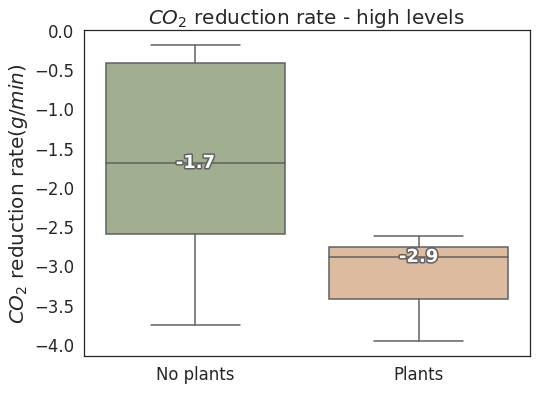

In [ ]:
# Plot the boxplots:
palette = ["#A2B38B", "#E6BA95"]
sns.set_theme(style="white",palette=palette,font_scale = 1.5)
fig, ax = plt.subplots(1,1, figsize=(8,6))
df_model[df_model.columns[-1]]=df_model[df_model.columns[-1]] *(-1)
df_model[df_model.columns[-2]]=df_model[df_model.columns[-2]] *(-1)
ax = sns.boxplot(data=df_model, x="Space",y=df_model.columns[-2])
add_median_labels(ax)
# ax = sns.swarmplot(data=df_model, x="Space",y=df_model.columns[-1],color="black")
ax.set_xlabel(" ")
ax.set_xticklabels(['No plants', 'Plants'])
ax.set_ylabel("$CO_2$ reduction rate$(g/min)$",fontsize=20)
ax.set_title("$CO_2$ reduction rate - high levels ",fontsize=20)
# plt.xticks(rotation=30)
plt.savefig("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Graphs/" + 'boxplot_result.png',bbox_inches = "tight")

Text(0.5, 1.0, '$CO_2$ reduction rate - high levels ')

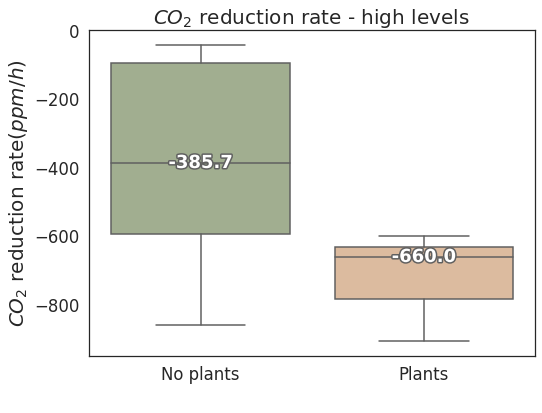

In [ ]:
# Plot the boxplots:
palette = ["#A2B38B", "#E6BA95"]
sns.set_theme(style="white",palette=palette,font_scale = 1.5)
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.boxplot(data=df_model, x="Space",y=df_model.columns[-1])
add_median_labels(ax)
# ax = sns.swarmplot(data=df_model, x="Space",y=df_model.columns[-1],color="black")
ax.set_xlabel(" ")
ax.set_xticklabels(['No plants', 'Plants'])
ax.set_ylabel("$CO_2$ reduction rate$(ppm/h)$",fontsize=20)
ax.set_title("$CO_2$ reduction rate - high levels ",fontsize=20)
# plt.xticks(rotation=30)
# plt.savefig("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Graphs/" + 'boxplot_result.png',bbox_inches = "tight")

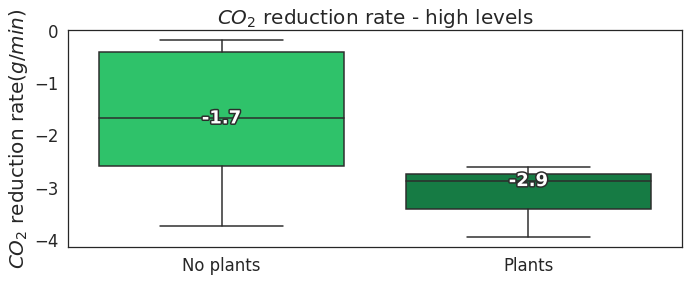

In [ ]:
# Poster graph:
# Plot the boxplots:
palette = ["#16db65", "#058c42"]
sns.set_theme(style="white",palette=palette,font_scale = 1.5)
fig, ax = plt.subplots(1,1, figsize=(11,4))
ax = sns.boxplot(data=df_model, x="Space",y=df_model.columns[-1])
add_median_labels(ax)
# ax = sns.swarmplot(data=df_model, x="Space",y=df_model.columns[-1],color="black")
ax.set_xlabel(" ")
ax.set_xticklabels(['No plants', 'Plants'])
ax.set_ylabel("$CO_2$ reduction rate$(g/min)$",fontsize=20)
ax.set_title("$CO_2$ reduction rate - high levels",fontsize=20)
# plt.xticks(rotation=30)
plt.savefig("/content/drive/MyDrive/Yehuda_David/Papers/Poster_ISEES2022/Figures/" + 'boxplot_high_co2_levels.png',bbox_inches = "tight")

Now i want to compare this results to the A/Ci curve results:

The calculation from the $A/C_i$ results is based on the average $CO_2$ assimilation in every $CO_2$ levels:

| **Ca (ppm)** 	| Tradescantia_avg 	| Peperomia_avg 	| Monalisa_avg 	| Philodendron_avg 	| Chlorophytum_avg 	| Sphatophilum_avg 	| **Avg** 	|  	|
|---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|:---:	|
| 450 	| 5.238593 	| 2.628896 	| 4.357822 	| 1.807792 	| 3.368031 	| 3.272076 	| **3.445535**	|  	|
| 1000 	| 7.498271 	| 6.183144 	| 6.561647 	| 3.937961 	| 5.143762 	| 6.087026 	| **5.901968** 	|  	|
| 1500 	| 8.118467 	| 8.160859 	| 7.160715 	| 4.707718 	| 5.686992 	| 6.95907 	| **6.79897** 	|  	|
| 1999 	| 8.275246 	| 9.116433 	| 7.340634 	| 4.998873 	| 5.953955 	| 7.336946 	| **7.170348** 	|  	|

The estimation of how much $CO_2$ the whole greenwall is uptake is by the folowing eqution:

## $$CO_2 \textrm{ Rate} = A\times Area\times LAI\times CO_2{\textrm{ Molar mass}}\times \frac{1}{10^6}\times 60$$

### While:


*  #### $CO_2 \textrm{ Rate}$ = $[\frac{g_{(CO_2)} }{min}]$

*  #### $ A = CO_2$ Assimilation rate $[\textrm{μmol }CO_2*s^-1*m^-2]$

* #### $ Area = \textrm{Area of the wall } [m^2\textrm{ wall}]$

* #### $LAI = \textrm{Leaf Area index } [\frac{m^2 \textrm{ leaf}}{m^2\textrm{ wall}}]$

* #### $CO_2{\textrm{ Molar mass}}= 44 [\frac{g}{mol}]$

* #### $\frac{1}{10^6} = [\frac{mol}{μmol}]$

* #### $60 = [\frac{sec}{min}]$

<!-- * #### $Time = Time \textrm{ [min]}$ -->

In [ ]:
def Assimilation_model(A,Area,LAI):
  # constants
  molar_mass = 44
  time_convert= 60
  mol_convert = 1/(10**6)

  # the model:
  rate = A*Area*LAI*molar_mass*time_convert*mol_convert
  # print(f"The co2 assimilation rate of the wall is {rate} [g/min]")
  return rate

Let find the maximum and minimum based on the A/Ci results:

In [ ]:
max_rate = Assimilation_model(A=7.170348,Area=16,LAI=5 )
min_rate = Assimilation_model(A=3.445535,Area=16,LAI=5 )
min_rate,max_rate

(0.727696992, 1.5143774976)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


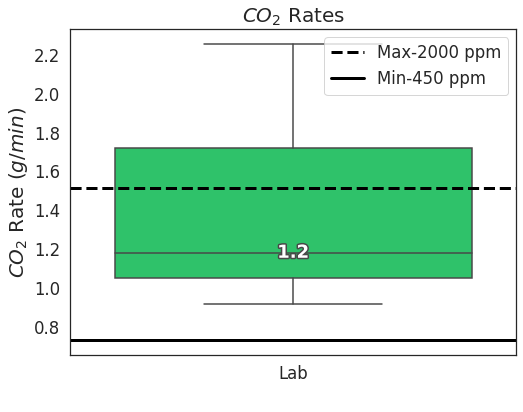

In [ ]:
# Plot:
lab_model = df_model[df_model['Space']=="Lab"]
lab_model['Rate(g/min)'] = lab_model['Rate(g/min)']-1.7
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.boxplot(data=lab_model, x="Space",y=df_model.columns[-1])
add_median_labels(ax)
# ax = sns.swarmplot(data=lab_model, x="Space",y=df_model.columns[-1],color="black")
plt.axhline(y = max_rate, color = 'black',lw=3, linestyle = '--',label="Max-2000 ppm")
plt.axhline(y = min_rate, color = 'black',lw=3, linestyle = '-',label="Min-450 ppm")
ax.set_xlabel(" ")
ax.set_ylabel("$CO_2$ Rate $(g/min)$",fontsize=20)
ax.set_title("$CO_2$ Rates",fontsize=20)
plt.legend(loc= "upper right")
# plt.xticks(rotation=30)
# plt.savefig("/content/drive/MyDrive/Greenwall/co2_and_counting_people/Co2_different_rooms_exp/Graphs/" + 'model_results.png',bbox_inches = "tight")